In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
import plotly.express as px
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
import warnings

In [2]:
warnings.filterwarnings("ignore")

In [3]:
data=pd.read_csv("C:\\Users\\ushak\\Desktop\\internship_project\\datasets\\winequalityN.csv")

In [4]:
data

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,NaN,11.2,6
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [5]:
data.columns

Index(['type', 'fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality'],
      dtype='object')

In [6]:
data.dtypes

type                     object
fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [7]:
#data['quality']=data['quality'].astype('object')

In [8]:
data['quality'].value_counts()

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64

In [9]:
data['type'].value_counts()

white    4898
red      1599
Name: type, dtype: int64

In [10]:
columns_to_encode = ['type']
one_hot_encoded = pd.get_dummies(data[columns_to_encode])

# Combine one hot encoded columns with original data
data_encoded = pd.concat([data, one_hot_encoded], axis=1)

# Remove original categorical columns
data_encoded.drop(data[columns_to_encode], axis=1, inplace=True)

# View the encoded data
data_encoded.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type_red,type_white
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,0,1
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,0,1
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,0,1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0,1
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0,1


In [11]:
data_encoded.isnull().sum()

fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
type_red                 0
type_white               0
dtype: int64

In [12]:
numcols=['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol']

In [13]:
imputer=SimpleImputer()
data_encoded[numcols]=imputer.fit_transform(data_encoded[numcols])
data_encoded.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
type_red                0
type_white              0
dtype: int64

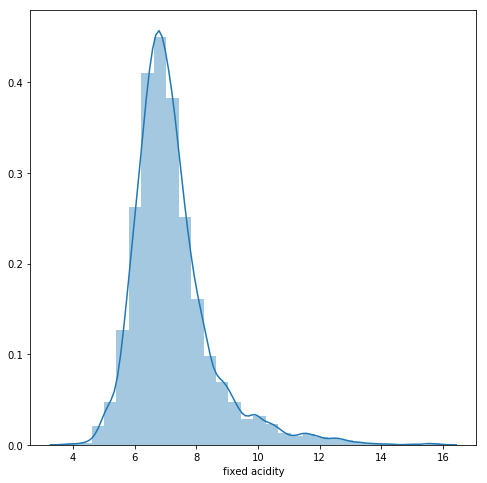

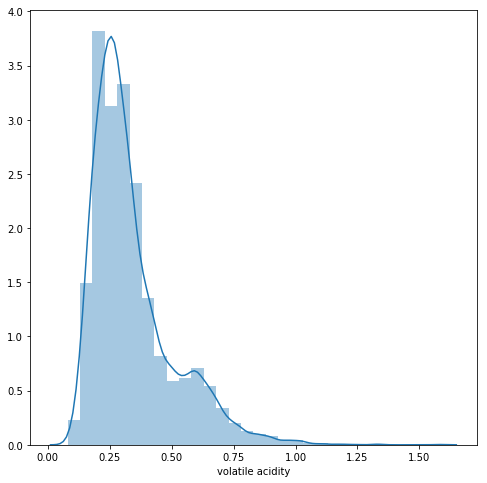

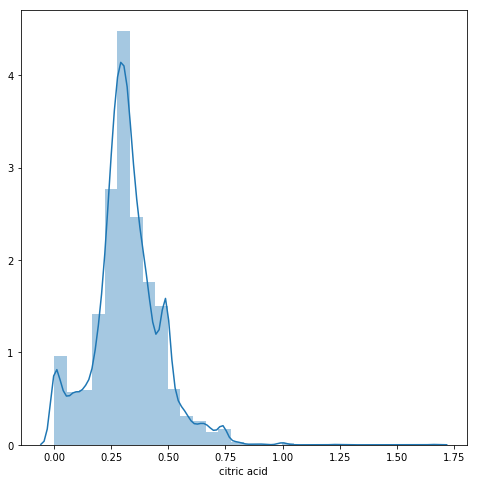

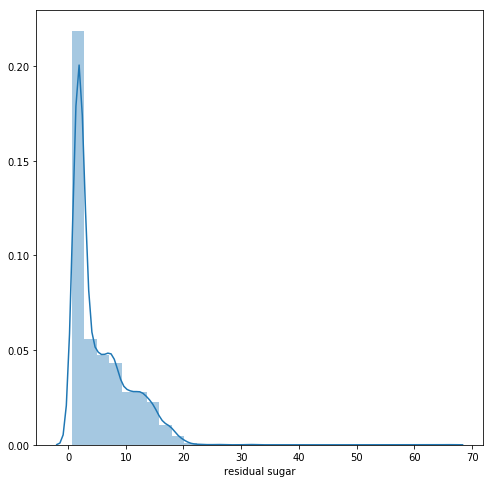

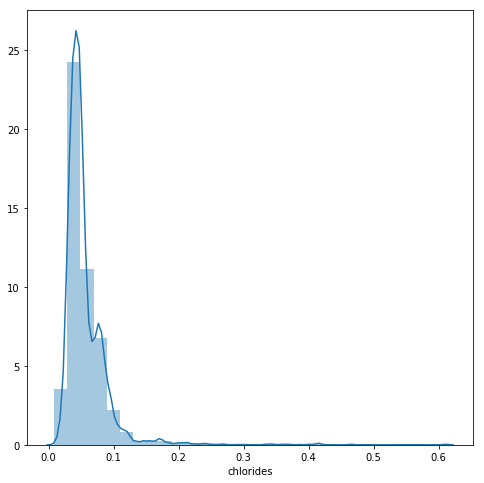

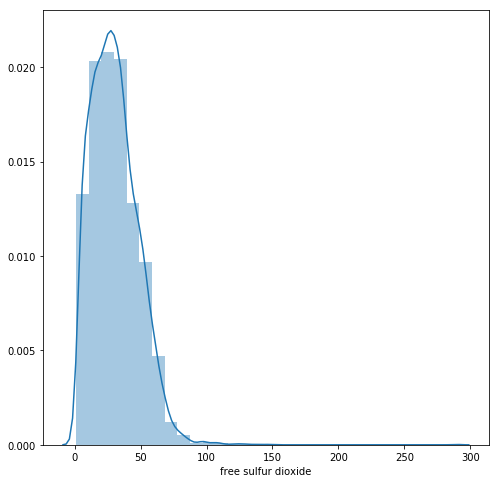

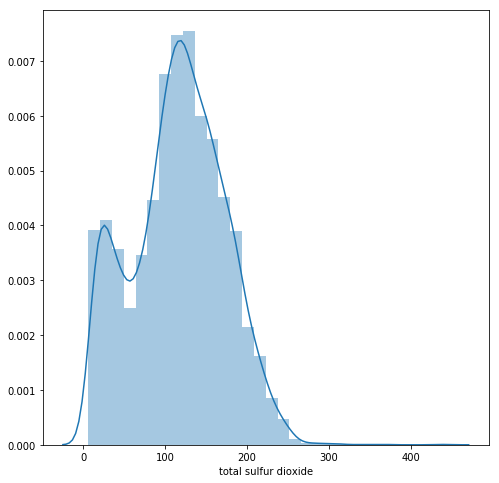

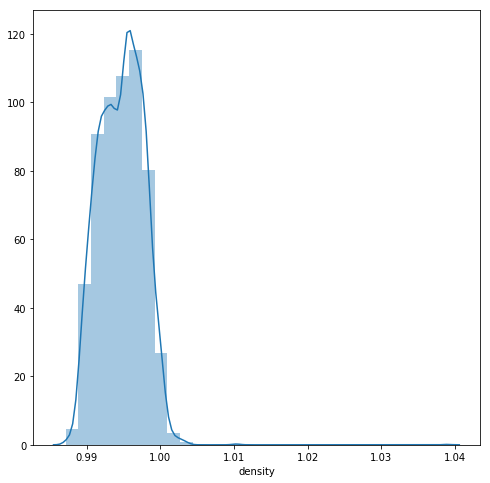

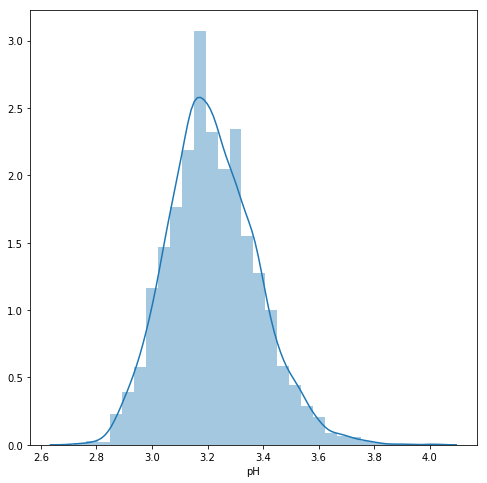

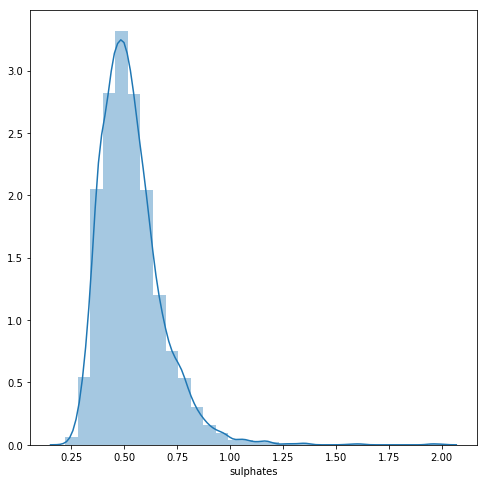

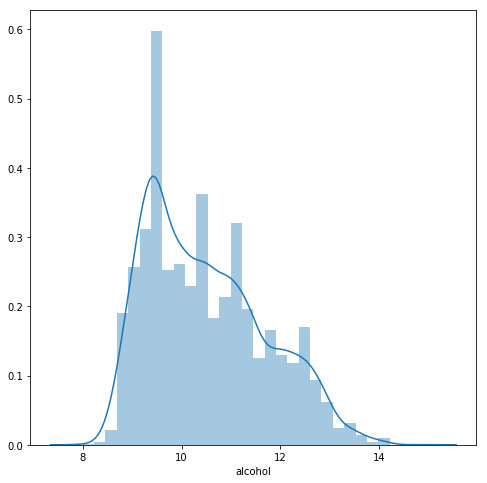

In [14]:
for col in numcols:
    plt.figure(figsize = (8, 8))
    sns.distplot(data_encoded[col],bins=30)
    plt.show()

In [15]:
scaler=RobustScaler()
data_encoded[numcols]=scaler.fit_transform(data_encoded[numcols])

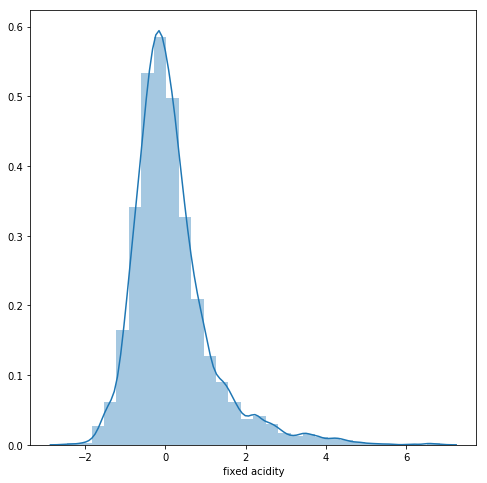

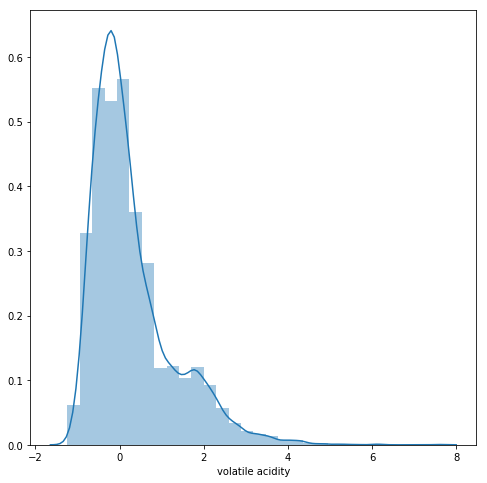

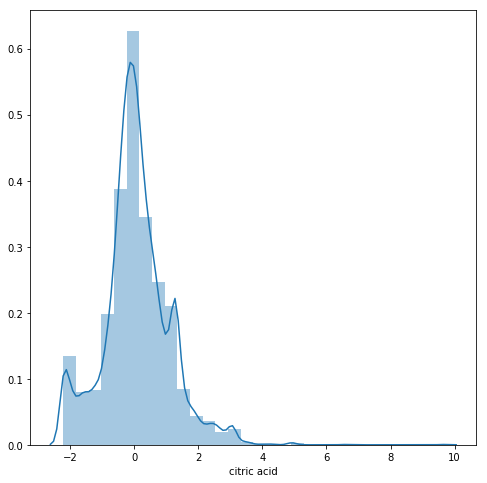

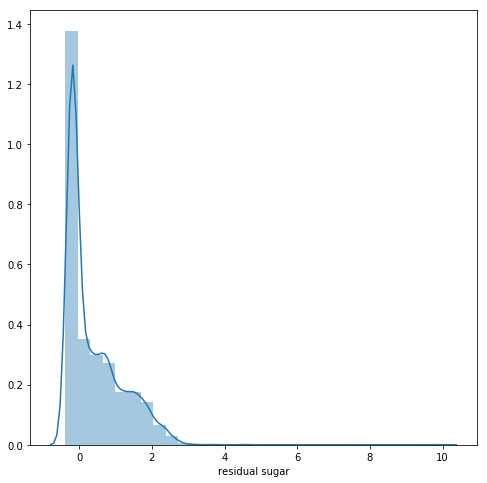

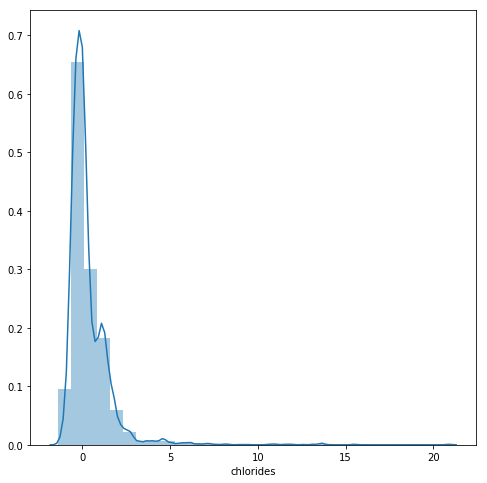

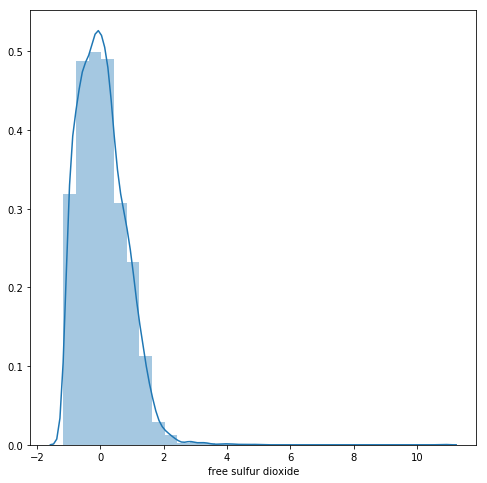

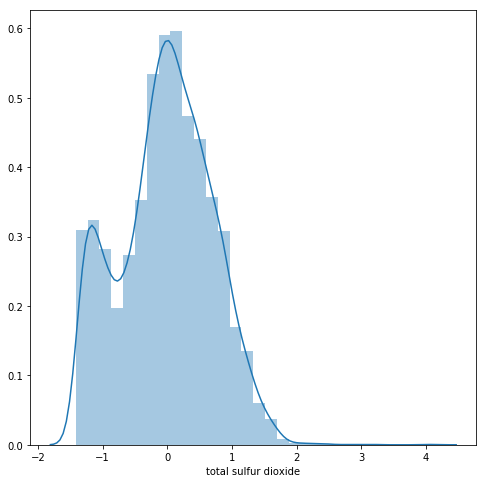

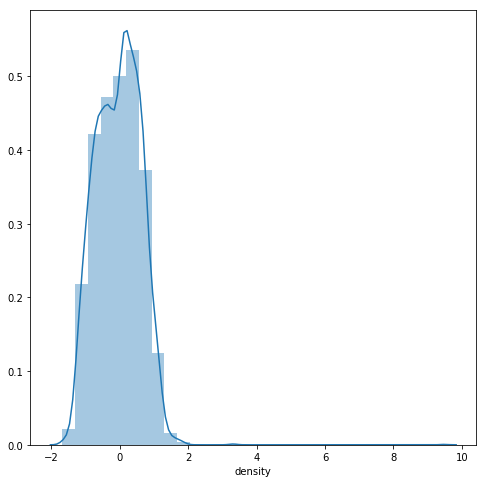

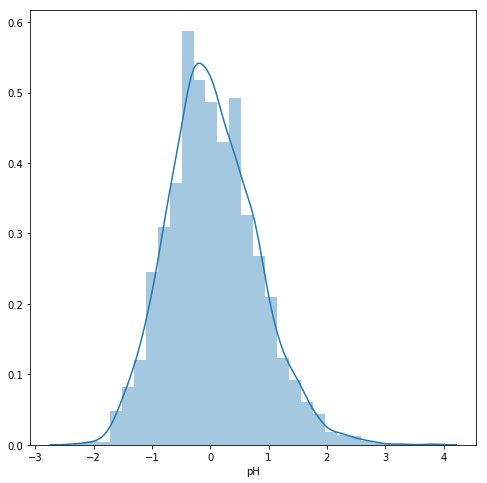

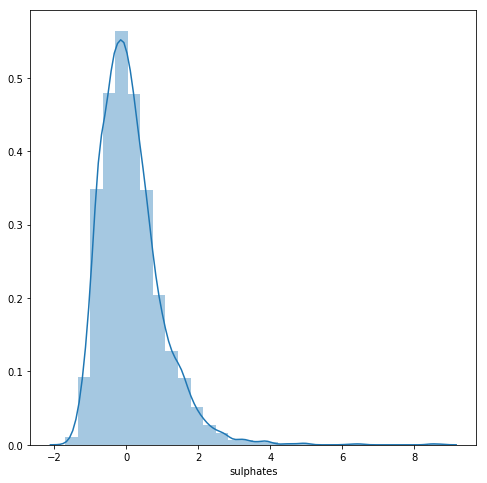

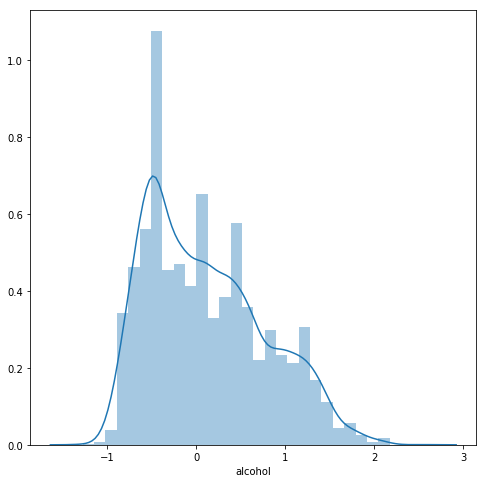

In [16]:
for col in numcols:
    plt.figure(figsize = (8, 8))
    sns.distplot(data_encoded[col],bins=30)
    plt.show()

In [17]:
data[numcols]= data[numcols]+ 0.1

In [18]:
for col in numcols:
    data[col] = np.log(data[col])
    
   
    
data

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,1.960095,-0.994252,-0.776529,3.034953,-1.931022,3.808882,5.136386,0.096219,1.131402,-0.597837,2.186051,6
1,white,1.856298,-0.916291,-0.820981,0.530628,-1.903809,2.646175,4.883559,0.089841,1.223775,-0.527633,2.261763,6
2,white,2.104134,-0.967584,-0.693147,1.945910,-1.897120,3.404525,4.575741,0.090846,1.211941,-0.616186,2.322388,6
3,white,1.987874,-1.108663,-0.867501,2.151762,-1.845160,3.852273,5.226284,0.091302,1.190888,-0.693147,2.302585,6
4,white,1.987874,-1.108663,-0.867501,2.151762,-1.845160,3.852273,5.226284,0.091302,1.190888,-0.693147,2.302585,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,red,1.840550,-0.356675,-1.714798,0.741937,-1.660731,3.468856,3.786460,0.090663,1.266948,-0.385662,2.360854,5
6493,red,1.791759,-0.430783,-1.609438,0.832909,-1.820159,3.666122,3.933784,0.090864,1.286474,NaN,2.424803,6
6494,red,1.856298,-0.494296,-1.469676,0.875469,-1.737271,3.370738,3.691376,0.091430,1.258461,-0.162519,2.406945,6
6495,red,1.791759,-0.294371,-1.514128,0.741937,-1.742969,3.468856,3.786460,0.091183,1.300192,-0.210721,2.332144,5


In [19]:
#from sklearn.preprocessing import QuantileTransformer
#qt = QuantileTransformer(n_quantiles=100, output_distribution='normal')

In [20]:
#data_encoded[numcols] = qt.fit_transform(data_encoded[numcols])

In [21]:
#data_encoded

In [22]:
numeric_cols = data_encoded[numcols]

#Calculate the first and third quartiles for each column
q1 = numeric_cols.quantile(0.25)
q3 = numeric_cols.quantile(0.75)

#Calculate the IQR for each column
iqr = q3 - q1

#Define the outlier bounds for each column
lower_bounds = q1 - 1.5 * iqr
upper_bounds = q3 + 1.5 * iqr

# Filter out rows that fall outside the bounds for each column
for col in numeric_cols.columns:
    data_encoded = data_encoded[(data_encoded[col] >= lower_bounds[col]) & (data_encoded[col] <= upper_bounds[col])]

# Print the filtered DataFrame
data_encoded

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type_red,type_white
1,-0.538462,0.058824,0.214286,-0.222222,0.074074,-0.625000,0.177215,-0.191398,0.428571,-0.117647,-0.444444,6,0,1
2,0.846154,-0.058824,0.642857,0.619048,0.111111,0.041667,-0.265823,0.045161,0.238095,-0.411765,-0.111111,6,0,1
3,0.153846,-0.352941,0.071429,0.873016,0.407407,0.750000,0.860759,0.152688,-0.095238,-0.647059,-0.222222,6,0,1
4,0.153846,-0.352941,0.071429,0.873016,0.407407,0.750000,0.860759,0.152688,-0.095238,-0.647059,-0.222222,6,0,1
5,0.846154,-0.058824,0.642857,0.619048,0.111111,0.041667,-0.265823,0.045161,0.238095,-0.411765,-0.111111,6,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,-0.615385,1.823529,-1.642857,-0.158730,1.592593,0.125000,-0.936709,0.002151,1.142857,0.411765,0.111111,5,1,0
6493,-0.846154,1.529412,-1.500000,-0.126984,0.555556,0.416667,-0.848101,0.049462,1.476190,0.124795,0.500000,6,1,0
6494,-0.538462,1.294118,-1.285714,-0.111111,1.074074,0.000000,-0.987342,0.182796,1.000000,1.411765,0.388889,6,1,0
6495,-0.846154,2.088235,-1.357143,-0.158730,1.037037,0.125000,-0.936709,0.124731,1.714286,1.176471,-0.055556,5,1,0


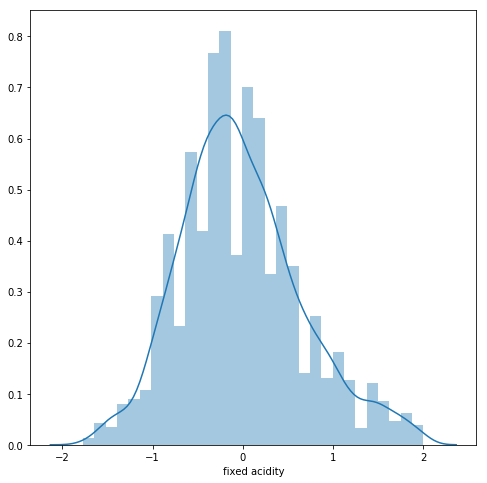

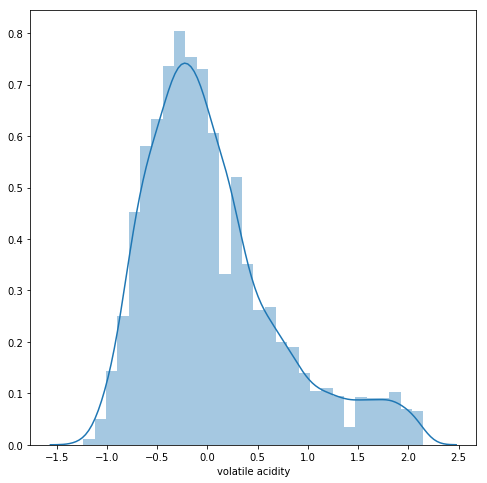

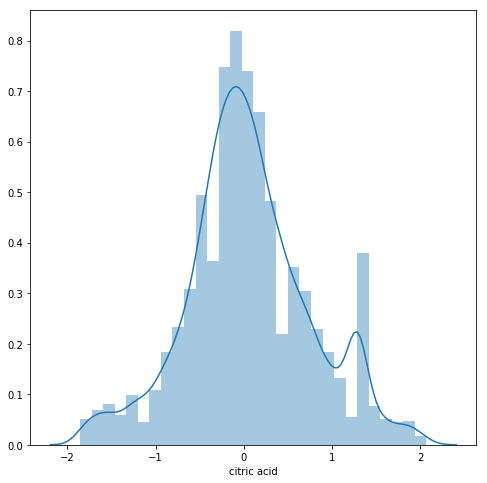

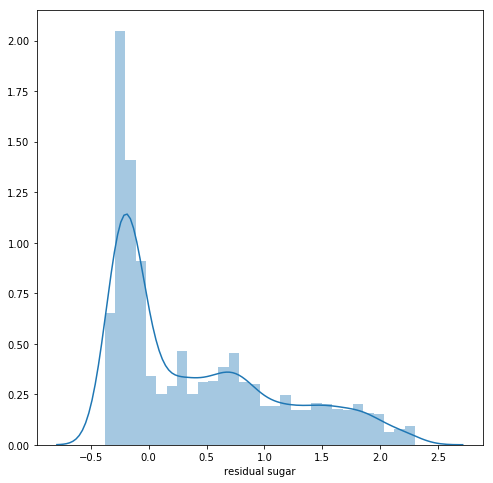

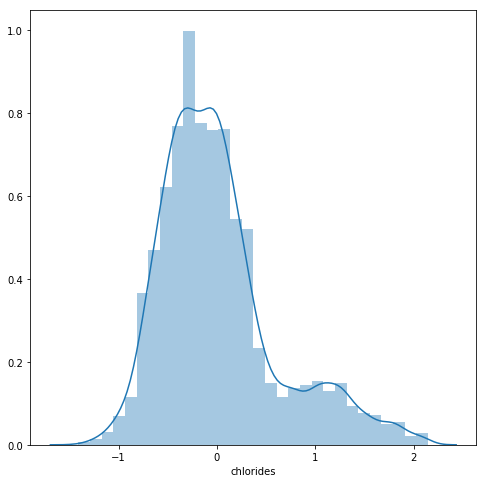

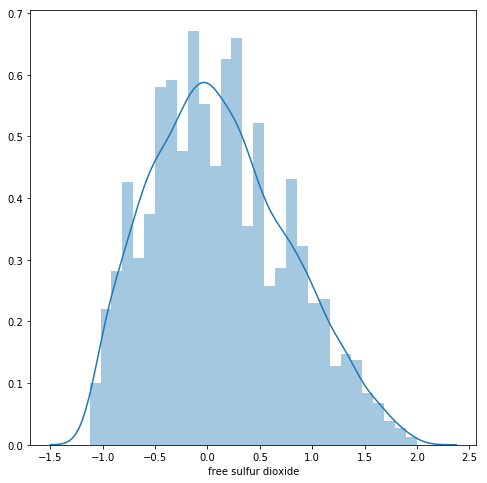

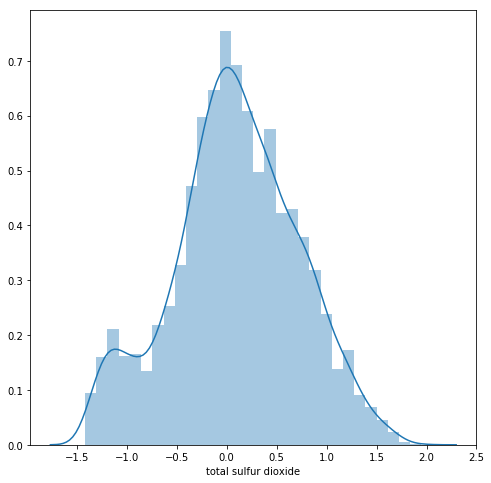

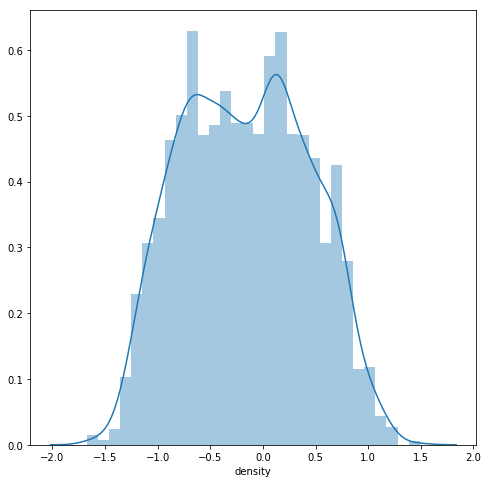

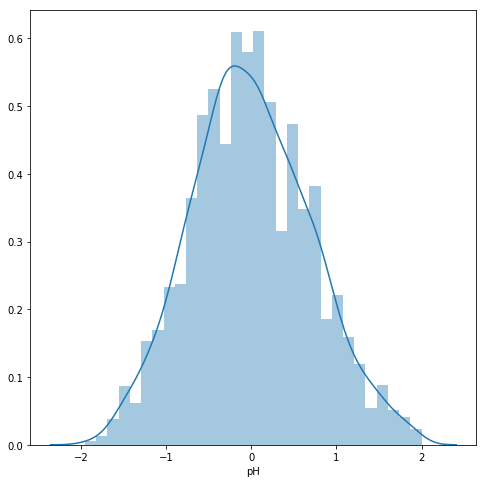

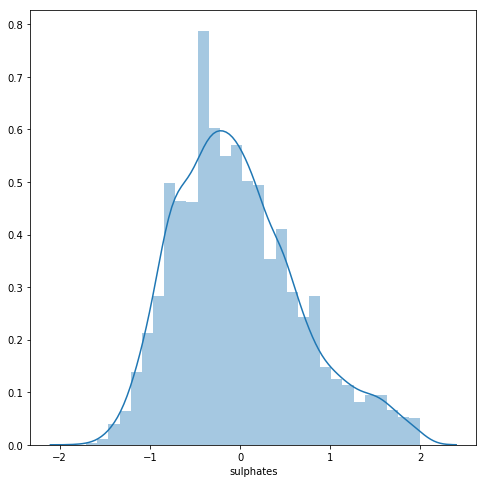

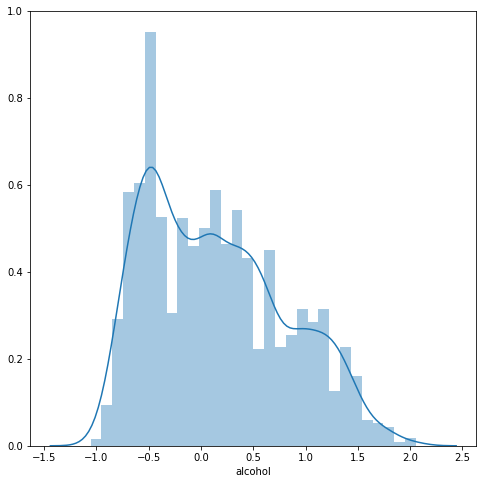

In [23]:
for col in numcols:
    plt.figure(figsize = (8, 8))
    sns.distplot(data_encoded[col],bins=30)
    plt.show()

In [24]:
corrr=data_encoded.corr().abs()

In [25]:
corrr

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type_red,type_white
fixed acidity,1.000000,0.156286,0.233711,0.033525,0.318472,0.174606,0.153056,0.345769,0.248110,0.135884,0.112689,0.098731,0.343667,0.343667
volatile acidity,0.156286,1.000000,0.304547,0.111403,0.426682,0.278691,0.260058,0.185178,0.176689,0.176088,0.006369,0.203353,0.565691,0.565691
citric acid,0.233711,0.304547,1.000000,0.088921,0.110260,0.132964,0.160981,0.032256,0.168995,0.022417,0.038543,0.069164,0.168569,0.168569
residual sugar,0.033525,0.111403,0.088921,1.000000,0.046240,0.417002,0.474766,0.654449,0.243239,0.128082,0.398278,0.041479,0.275750,0.275750
chlorides,0.318472,0.426682,0.110260,0.046240,1.000000,0.183685,0.230409,0.522257,0.201477,0.308671,0.392359,0.268570,0.697053,0.697053
free sulfur dioxide,0.174606,0.278691,0.132964,0.417002,0.183685,1.000000,0.678135,0.172239,0.121562,0.098457,0.205057,0.063754,0.374796,0.374796
total sulfur dioxide,0.153056,0.260058,0.160981,0.474766,0.230409,0.678135,1.000000,0.234849,0.188720,0.159915,0.333267,0.087187,0.586176,0.586176
density,0.345769,0.185178,0.032256,0.654449,0.522257,0.172239,0.234849,1.000000,0.053357,0.198492,0.776101,0.313591,0.296604,0.296604
pH,0.248110,0.176689,0.168995,0.243239,0.201477,0.121562,0.188720,0.053357,1.000000,0.277368,0.058024,0.038382,0.331085,0.331085
sulphates,0.135884,0.176088,0.022417,0.128082,0.308671,0.098457,0.159915,0.198492,0.277368,1.000000,0.030629,0.036542,0.408040,0.408040


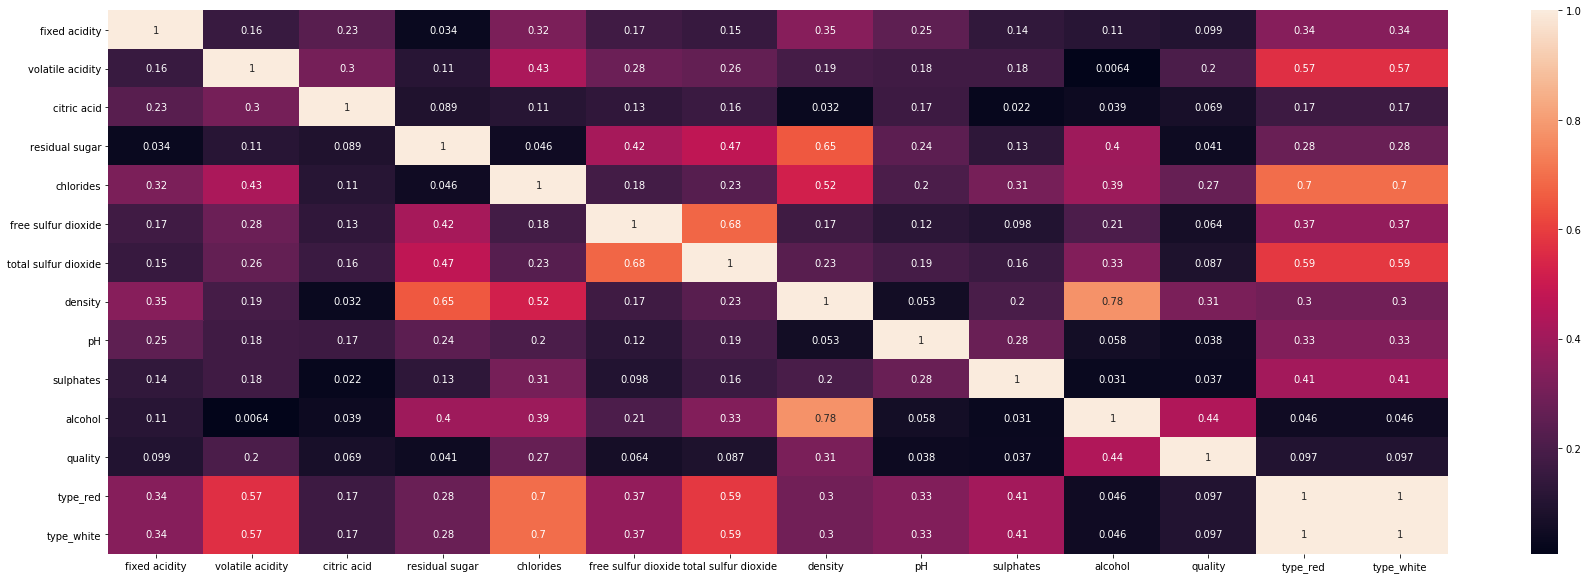

In [26]:
fig, ax = plt.subplots(figsize=(30, 10))
sns.heatmap(corrr,annot=True)
plt.show()

In [27]:
X =data_encoded.drop(['quality'], axis=1)
y = data_encoded[['quality']]


In [28]:
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type_red,type_white
1,-0.538462,0.058824,0.214286,-0.222222,0.074074,-0.625000,0.177215,-0.191398,0.428571,-0.117647,-0.444444,0,1
2,0.846154,-0.058824,0.642857,0.619048,0.111111,0.041667,-0.265823,0.045161,0.238095,-0.411765,-0.111111,0,1
3,0.153846,-0.352941,0.071429,0.873016,0.407407,0.750000,0.860759,0.152688,-0.095238,-0.647059,-0.222222,0,1
4,0.153846,-0.352941,0.071429,0.873016,0.407407,0.750000,0.860759,0.152688,-0.095238,-0.647059,-0.222222,0,1
5,0.846154,-0.058824,0.642857,0.619048,0.111111,0.041667,-0.265823,0.045161,0.238095,-0.411765,-0.111111,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,-0.615385,1.823529,-1.642857,-0.158730,1.592593,0.125000,-0.936709,0.002151,1.142857,0.411765,0.111111,1,0
6493,-0.846154,1.529412,-1.500000,-0.126984,0.555556,0.416667,-0.848101,0.049462,1.476190,0.124795,0.500000,1,0
6494,-0.538462,1.294118,-1.285714,-0.111111,1.074074,0.000000,-0.987342,0.182796,1.000000,1.411765,0.388889,1,0
6495,-0.846154,2.088235,-1.357143,-0.158730,1.037037,0.125000,-0.936709,0.124731,1.714286,1.176471,-0.055556,1,0


In [29]:
y

,quality
1,6
2,6
3,6
4,6
5,6
...,...
6492,5
6493,6
6494,6
6495,5


In [30]:
# train and validation set
X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, test_size=0.3,random_state=42)

In [31]:
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=0.2,random_state=42)

In [32]:
poly = PolynomialFeatures(degree=1)
X_train_poly = poly.fit_transform(X_train)
X_val_poly=poly.fit_transform(X_val)
X_test_poly = poly.transform(X_test)



In [33]:
lr = LinearRegression()
lr.fit(X_train_poly, y_train)

LinearRegression()

In [34]:
# r2 of train and val
y_val_pred1 = lr.predict(X_val_poly)
r2 = r2_score(y_val, y_val_pred1)
print("R-squared score:", r2)
# mse of train and val
mse = mean_squared_error(y_val, y_val_pred1)
print("Mean squared error:", mse)
rmse_test = np.sqrt(mse)
print("Root Mean Squared Error:", rmse_test)
mae_test=mean_absolute_error(y_val, y_val_pred1)
print("Mean Absolute Error:",mae_test)
# r2 of test and pred (degree=1)
y_test_pred1 = lr.predict(X_test_poly)
r2 = r2_score(y_test, y_test_pred1)
print("R-squared score:", r2)
# mse of test and pred (degree=1)
mse = mean_squared_error(y_test, y_test_pred1)
print("Mean squared error:", mse)
rmse_test = np.sqrt(mse)
print("Root Mean Squared Error:", rmse_test)
mae_test=mean_absolute_error(y_test, y_test_pred1)
print("Mean Absolute Error:",mae_test)

R-squared score: 0.24518189196746987
Mean squared error: 0.5609912274155091
Root Mean Squared Error: 0.7489934762169221
Mean Absolute Error: 0.5858850864204844
R-squared score: 0.27852206258482926
Mean squared error: 0.5216958857014166
Root Mean Squared Error: 0.7222851830831203
Mean Absolute Error: 0.558045975250321


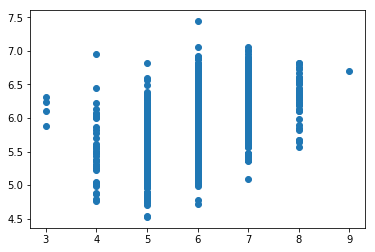

In [35]:
plt.scatter(y_test, y_test_pred1)

In [36]:
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_val_poly=poly.fit_transform(X_val)
X_test_poly = poly.transform(X_test)



In [37]:
lr = LinearRegression()
lr.fit(X_train_poly, y_train)

LinearRegression()

In [38]:
# r2 of train and val
y_val_pred2 = lr.predict(X_val_poly)
r2 = r2_score(y_val, y_val_pred2)
print("R-squared score:", r2)
# mse of train and val
mse = mean_squared_error(y_val, y_val_pred1)
print("Mean squared error:", mse)
rmse_test = np.sqrt(mse)
print("Root Mean Squared Error:", rmse_test)
mae_test=mean_absolute_error(y_val, y_val_pred2)
print("Mean Absolute Error:",mae_test)
# r2 of test and pred (degree=1)
y_test_pred2 = lr.predict(X_test_poly)
r2 = r2_score(y_test, y_test_pred2)
print("R-squared score:", r2)
# mse of test and pred (degree=1)
mse = mean_squared_error(y_test, y_test_pred2)
print("Mean squared error:", mse)
rmse_test = np.sqrt(mse)
print("Root Mean Squared Error:", rmse_test)
mae_test=mean_absolute_error(y_test, y_test_pred2)
print("Mean Absolute Error:",mae_test)

R-squared score: 0.24295000054799154
Mean squared error: 0.5609912274155091
Root Mean Squared Error: 0.7489934762169221
Mean Absolute Error: 0.5867682224333541
R-squared score: 0.34103563430099526
Mean squared error: 0.4764927388364319
Root Mean Squared Error: 0.6902845346930727
Mean Absolute Error: 0.5327389569063333


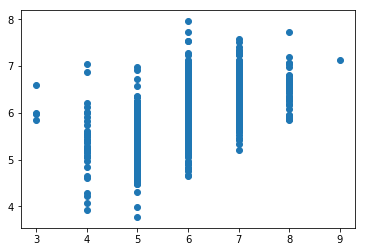

In [39]:
plt.scatter(y_test, y_test_pred2)

In [40]:
y_test

,quality
486,6
2113,5
743,5
1208,6
5419,5
...,...
2073,5
3075,7
4850,6
6212,6


In [41]:
pd.DataFrame(y_test_pred2.astype('int64'))

,0
0,6
1,5
2,5
3,6
4,5
...,...
1496,5
1497,6
1498,5
1499,5


In [42]:
##XGBOOST
from xgboost import XGBRegressor
import xgboost as xgb
from sklearn import metrics

In [43]:
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_val_poly=poly.fit_transform(X_val)
X_test_poly = poly.transform(X_test)


In [44]:
xgb_reg = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, max_depth=3, learning_rate=0.1)


In [45]:
xgb_reg.fit(X_train_poly, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [46]:
y_pred = xgb_reg.predict(X_val_poly)

In [47]:
r2_sales = metrics.r2_score(y_val, y_pred)
print('R Squared value = ', r2_sales)
mse = mean_squared_error(y_val, y_pred)
print("Mean squared error:", mse)
rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)
mae=mean_absolute_error(y_val, y_pred)
print("Mean Absolute Error:",mae)

R Squared value =  0.3070158167773439
Mean squared error: 0.515035401759145
Root Mean Squared Error: 0.7176596698708553
Mean Absolute Error: 0.5468988146489425


In [48]:
data_prediction =xgb_reg.predict(X_test_poly)

In [49]:
# R squared Value
r2_data = metrics.r2_score(y_test, data_prediction)
print('R Squared value = ', r2_data)
mse = mean_squared_error(y_test, data_prediction)
print("Mean squared error:", mse)
rmse_test = np.sqrt(mse)
print("Root Mean Squared Error:", rmse_test)
mae_test=mean_absolute_error(y_test, data_prediction)
print("Mean Absolute Error:",mae_test)

R Squared value =  0.4033756218031559
Mean squared error: 0.43141510955912793
Root Mean Squared Error: 0.6568219770677043
Mean Absolute Error: 0.5077375228368466


In [50]:
from sklearn.ensemble import BaggingRegressor
# Create a polynomial regression model
poly_reg = PolynomialFeatures(degree=2)
linear_reg = LinearRegression()

# Create a bagging regressor
bag_reg = BaggingRegressor(base_estimator=linear_reg, n_estimators=10, max_samples=0.5, random_state=42)

# Fit the bagging model to the data
bag_reg.fit(poly_reg.fit_transform(X_train), y_train)

BaggingRegressor(base_estimator=LinearRegression(), max_samples=0.5,
                 random_state=42)

In [51]:
y_pred = bag_reg.predict(poly_reg.fit_transform(X_val))

In [52]:
# R squared Value
r2_data = metrics.r2_score(y_val, y_pred)
print('R Squared value = ', r2_data)
mse = mean_squared_error(y_val, y_pred)
print("Mean squared error:", mse)
rmse_test = np.sqrt(mse)
print("Root Mean Squared Error:", rmse_test)
mae_test=mean_absolute_error(y_val, y_pred)
print("Mean Absolute Error:",mae_test)

R Squared value =  0.24974639383749053
Mean squared error: 0.5575988266776972
Root Mean Squared Error: 0.7467254024590949
Mean Absolute Error: 0.5830786151046424


In [53]:
y_pred = bag_reg.predict(poly_reg.fit_transform(X_test))

In [54]:
# R squared Value
r2_data = metrics.r2_score(y_test, y_pred)
print('R Squared value = ', r2_data)
mse = mean_squared_error(y_test, data_prediction)
print("Mean squared error:", mse)
rmse_test = np.sqrt(mse)
print("Root Mean Squared Error:", rmse_test)
mae_test=mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:",mae_test)

R Squared value =  0.34426746028275346
Mean squared error: 0.43141510955912793
Root Mean Squared Error: 0.6568219770677043
Mean Absolute Error: 0.5306877350488168


In [55]:
y_test

,quality
486,6
2113,5
743,5
1208,6
5419,5
...,...
2073,5
3075,7
4850,6
6212,6


In [56]:
pd.DataFrame(y_pred).astype('int64')

,0
0,6
1,5
2,5
3,6
4,5
...,...
1496,5
1497,6
1498,5
1499,5
